In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
/Users/yujing/miniconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
data_path = "./RNA_DE"
cell_type1 = "MLI1"
cell_type2 = "MLI2-PLI"

In [3]:
df = pd.read_csv(os.path.join(data_path, 
                              "deg_deseq2_ensemble_{}_{}.txt".format(cell_type1, cell_type2)), 
                 sep = "\t").reset_index().rename(columns = {"index" : "gene"})
df

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,Luzp2,30.675331,-2.361090,0.143652,-16.436125,1.054487e-60,1.116174e-56
1,Grid2,309.843132,2.172228,0.142808,15.210869,2.995390e-52,1.585310e-48
2,Cadm1,10.212471,-3.384085,0.226401,-14.947335,1.621074e-50,5.719690e-47
3,Grid1,8.513269,3.483776,0.268747,12.963054,1.981954e-38,5.244745e-35
4,Ptprk,12.621889,4.923519,0.382940,12.857142,7.842289e-38,1.660213e-34
...,...,...,...,...,...,...,...
24404,Gm11426,0.000000,NaN,NaN,NaN,NaN,NaN
24405,Calml3,0.000000,NaN,NaN,NaN,NaN,NaN
24406,Gm2399,0.000000,NaN,NaN,NaN,NaN,NaN
24407,Gm29501,0.000000,NaN,NaN,NaN,NaN,NaN


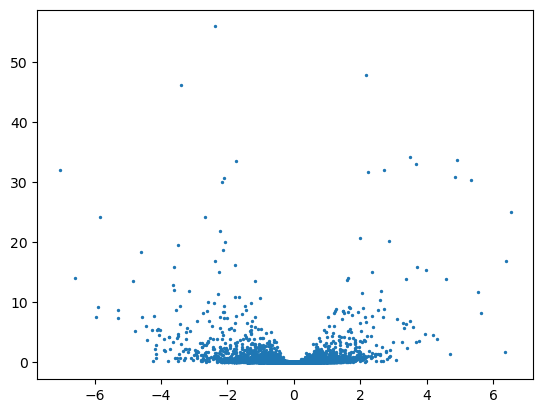

In [4]:
plt.scatter(df["log2FoldChange"], -np.log10(df["padj"]) , s = 2)

# use log fold change 1 / -1 as cuttoff

In [5]:
df[(df["padj"] < 0.01) & (df["log2FoldChange"] > 1)]

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
1,Grid2,309.843132,2.172228,0.142808,15.210869,2.995390e-52,1.585310e-48
3,Grid1,8.513269,3.483776,0.268747,12.963054,1.981954e-38,5.244745e-35
4,Ptprk,12.621889,4.923519,0.382940,12.857142,7.842289e-38,1.660213e-34
6,Adgrl3,30.227000,3.681066,0.289751,12.704255,5.600018e-37,8.468027e-34
8,Socs2,2.062057,2.721992,0.217572,12.510739,6.521458e-36,7.669959e-33
...,...,...,...,...,...,...,...
320,Lrrc8d,3.138071,1.032951,0.281496,3.669501,2.430242e-04,8.013741e-03
325,Adam12,4.208202,1.536600,0.423006,3.632576,2.806063e-04,9.088006e-03
326,Zic5,0.808555,2.886923,0.794934,3.631652,2.816123e-04,9.088006e-03
327,Dcc,10.262009,1.831451,0.504278,3.631827,2.814223e-04,9.088006e-03


In [6]:
df[(df["padj"] < 0.01) & (df["log2FoldChange"] < -1)]

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,Luzp2,30.675331,-2.361090,0.143652,-16.436125,1.054487e-60,1.116174e-56
2,Cadm1,10.212471,-3.384085,0.226401,-14.947335,1.621074e-50,5.719690e-47
5,Cntn6,7.961774,-1.741754,0.135978,-12.809129,1.457623e-37,2.571489e-34
7,Cdh22,3.416106,-7.038697,0.562222,-12.519432,5.845179e-36,7.669959e-33
11,Dpp6,30.154600,-2.118118,0.173219,-12.227952,2.204271e-34,1.944351e-31
...,...,...,...,...,...,...,...
323,Litaf,2.685327,-2.968667,0.810964,-3.660662,2.515643e-04,8.218545e-03
324,Optn,1.216802,-1.029452,0.282010,-3.650409,2.618235e-04,8.527391e-03
329,Gm28539,1.494098,-1.209917,0.334142,-3.620970,2.935002e-04,9.414241e-03
330,Galntl6,1.599180,-2.018730,0.558181,-3.616624,2.984706e-04,9.544748e-03


# proceed with threshold 1 first

In [7]:
# check foldchange Granule cell marker gene
df[df["gene"].isin(["Lypd6", "Prkcd"])]
# fold change is calculated by granule / purkinje

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
380,Lypd6,0.982141,6.359255,1.864198,3.411255,0.000647,0.017965
422,Prkcd,2.014185,0.862363,0.263381,3.274202,0.001060,0.026398


In [8]:
category = np.zeros(df.shape[0]).astype(object)
category[(df["padj"] < 0.01) & (df["log2FoldChange"] > 1)]= cell_type1
category[(df["padj"] < 0.01) & (df["log2FoldChange"] < -1)] = cell_type2

In [9]:
df["category"] = category
df.head()

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,category
0,Luzp2,30.675331,-2.361090,0.143652,-16.436125,1.054487e-60,1.116174e-56,MLI2-PLI
1,Grid2,309.843132,2.172228,0.142808,15.210869,2.995390e-52,1.585310e-48,MLI1
2,Cadm1,10.212471,-3.384085,0.226401,-14.947335,1.621074e-50,5.719690e-47,MLI2-PLI
3,Grid1,8.513269,3.483776,0.268747,12.963054,1.981954e-38,5.244745e-35,MLI1
4,Ptprk,12.621889,4.923519,0.382940,12.857142,7.842289e-38,1.660213e-34,MLI1


In [10]:
# check foldchange Granule cell marker gene
df[df["gene"].isin(["Lypd6", "Prkcd"])]
# fold change is calculated by granule / purkinje

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,category
380,Lypd6,0.982141,6.359255,1.864198,3.411255,0.000647,0.017965,0.0
422,Prkcd,2.014185,0.862363,0.263381,3.274202,0.001060,0.026398,0.0


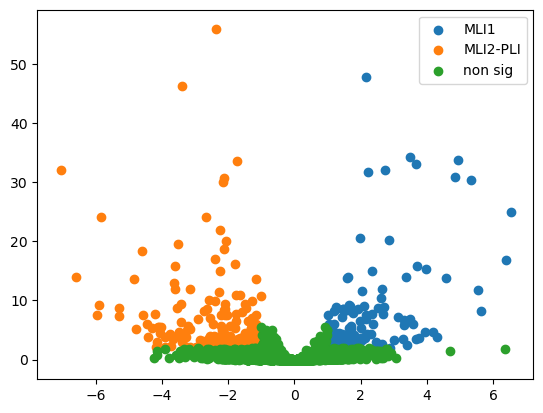

In [11]:
plt.scatter(df[df["category"] == cell_type1]["log2FoldChange"], -np.log10(df[df["category"] == cell_type1]["padj"]), label = cell_type1)
plt.scatter(df[df["category"] == cell_type2]["log2FoldChange"], -np.log10(df[df["category"] == cell_type2]["padj"]), label = cell_type2 )
plt.scatter(df[df["category"] == 0]["log2FoldChange"], -np.log10(df[df["category"] == 0]["padj"]), label = "non sig" )
plt.legend()

In [12]:
DE_genes = df[df["category"] != 0]
DE_genes

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,category
0,Luzp2,30.675331,-2.361090,0.143652,-16.436125,1.054487e-60,1.116174e-56,MLI2-PLI
1,Grid2,309.843132,2.172228,0.142808,15.210869,2.995390e-52,1.585310e-48,MLI1
2,Cadm1,10.212471,-3.384085,0.226401,-14.947335,1.621074e-50,5.719690e-47,MLI2-PLI
3,Grid1,8.513269,3.483776,0.268747,12.963054,1.981954e-38,5.244745e-35,MLI1
4,Ptprk,12.621889,4.923519,0.382940,12.857142,7.842289e-38,1.660213e-34,MLI1
...,...,...,...,...,...,...,...,...
327,Dcc,10.262009,1.831451,0.504278,3.631827,2.814223e-04,9.088006e-03,MLI1
329,Gm28539,1.494098,-1.209917,0.334142,-3.620970,2.935002e-04,9.414241e-03,MLI2-PLI
330,Galntl6,1.599180,-2.018730,0.558181,-3.616624,2.984706e-04,9.544748e-03,MLI2-PLI
332,Cyp7b1,3.874135,-1.182885,0.327383,-3.613154,3.024951e-04,9.615346e-03,MLI2-PLI


# Map back to genome

In [13]:
meta = pd.read_csv(os.path.join("../annot", "Final", "mm10_25kb_bins_genes_09022022.csv"))
meta = meta[["name", "chrom", "start", "end", "gene", "100kb name", "100kb bin", "200kb name", "200kb bin"]]
meta["gene"] = meta["gene"].str.replace("-", ".")

# Mismatch between DE gene naming and annotated namming

In [15]:
DE_sig_25kb = meta.merge(DE_genes)

In [16]:
# missing genes
miss_genes = [x for x in DE_genes["gene"]  if x not in DE_sig_25kb["gene"].unique()]
print ("missing {} gene, {} of detected DE genes".format(len(miss_genes), len(miss_genes) / DE_genes.shape[0]) )

# missing gene are not trivial
miss_df = df[df["gene"].isin(miss_genes)]
miss_df

missing 15 gene, 0.05319148936170213 of detected DE genes


,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,category
25,Gm11417,2.877119,6.387448,0.693996,9.203874,3.452731e-20,1.405660e-17,MLI1
80,X4930578G10Rik,6.252710,-1.754288,0.272879,-6.428817,1.286004e-10,1.660043e-08,MLI2-PLI
96,Gm2163,10.679481,-1.274276,0.208442,-6.113337,9.756922e-10,1.064712e-07,MLI2-PLI
123,Fam19a1,2.367026,-4.121432,0.750212,-5.493694,3.936128e-08,3.359993e-06,MLI2-PLI
144,A230006K03Rik,1.161716,-3.493849,0.677446,-5.157382,2.504271e-07,1.832298e-05,MLI2-PLI
145,Lrrc16a,5.248665,-1.293237,0.252042,-5.131043,2.881410e-07,2.089022e-05,MLI2-PLI
148,Gm20642,3.258153,-1.476653,0.292465,-5.048994,4.441428e-07,3.155202e-05,MLI2-PLI
178,Gm16054,0.396952,4.308073,0.911317,4.727307,2.275174e-06,1.345403e-04,MLI1
180,Gm44071,1.893080,2.098502,0.447438,4.690044,2.731466e-06,1.597379e-04,MLI1
221,Gm12394,4.605153,-1.567770,0.363856,-4.308762,1.641706e-05,7.792584e-04,MLI2-PLI


# OK! tried our best to get all genes

In [17]:
DE_sig_25kb["200kb bin"] = DE_sig_25kb["start"] // 200000
DE_sig_25kb["200kb name"] = DE_sig_25kb["chrom"] + "-g" + DE_sig_25kb["200kb bin"].astype(str)

In [18]:
cols = ["200kb name","chrom", "200kb bin", "gene", "baseMean", "log2FoldChange", "pvalue", "padj", "category"]

In [19]:
DE_sig_200kb = DE_sig_25kb.copy()
# Get DE norm counts
# Do not repeat count version
DE_sig_200kb_no_dup = DE_sig_200kb.drop_duplicates(subset=["gene", "200kb name"], keep='first')

In [20]:
DE_sig_200kb_no_dup

,name,chrom,start,end,gene,100kb name,100kb bin,200kb name,200kb bin,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,category
0,chr1-492,chr1,15275000,15300000,Kcnb2,chr1-g152,152.0,chr1-g76,76,2.308438,-2.168876,0.456928,-4.746652,2.068109e-06,1.246851e-04,MLI2-PLI
5,chr1-497,chr1,15400000,15425000,Kcnb2,chr1-g154,154.0,chr1-g77,77,2.308438,-2.168876,0.456928,-4.746652,2.068109e-06,1.246851e-04,MLI2-PLI
13,chr1-505,chr1,15600000,15625000,Kcnb2,chr1-g156,156.0,chr1-g78,78,2.308438,-2.168876,0.456928,-4.746652,2.068109e-06,1.246851e-04,MLI2-PLI
18,chr1-1918,chr1,50925000,50950000,Tmeff2,chr1-g509,509.0,chr1-g254,254,20.725975,1.521625,0.311567,4.883783,1.040695e-06,6.847415e-05,MLI1
21,chr1-1921,chr1,51000000,51025000,Tmeff2,chr1-g510,510.0,chr1-g255,255,20.725975,1.521625,0.311567,4.883783,1.040695e-06,6.847415e-05,MLI1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3362,chrX-6475,chrX,167600000,167625000,Frmpd4,chrX-g1676,1676.0,chrX-g838,838,29.971532,2.214803,0.178152,12.432124,1.749229e-35,1.851559e-32,MLI1
3370,chrX-6483,chrX,167800000,167825000,Frmpd4,chrX-g1678,1678.0,chrX-g839,839,29.971532,2.214803,0.178152,12.432124,1.749229e-35,1.851559e-32,MLI1
3378,chrX-6491,chrX,168000000,168025000,Frmpd4,chrX-g1680,1680.0,chrX-g840,840,29.971532,2.214803,0.178152,12.432124,1.749229e-35,1.851559e-32,MLI1
3386,chrX-6499,chrX,168200000,168225000,Frmpd4,chrX-g1682,1682.0,chrX-g841,841,29.971532,2.214803,0.178152,12.432124,1.749229e-35,1.851559e-32,MLI1


In [21]:
# get norm counts
# need to get the norm count of 2 cell types to get the combined norm counts
norm_counts = pd.read_csv(os.path.join(data_path, 
                                       "ensembl_gene_counts_normalized_MLI2-PLI.txt"), sep = "\t")

idx = (norm_counts.iloc[0].isin([cell_type1 ,cell_type2, "CLUSTER"])).values

norm_counts = norm_counts.iloc[:, idx]

# take a look
norm_counts.head()

/var/folders/j4/wgbmg2rn5q768jr012zxqngh0000gn/T/ipykernel_54897/767050249.py:3: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114) have mixed types. Specify dtype option on import or set low_memory=False.
  norm_counts = pd.read_csv(os.path.join(data_path,


,ID,VIIa_F002.8,VIIa_M002.9,VIIa_M006.9,VIIb_F002.8,VIIb_M002.7,VIIb_M006.8,VIIc_M002.8,VIId_M002.9,VIIa_F002.9,VIIa_M002.10,VIIa_M006.10,VIIb_F002.9,VIIb_M002.8,VIIb_M006.9,VIIc_M002.9,VIId_M002.10
0,CLUSTER,MLI1,MLI1,MLI1,MLI1,MLI1,MLI1,MLI1,MLI1,MLI2-PLI,MLI2-PLI,MLI2-PLI,MLI2-PLI,MLI2-PLI,MLI2-PLI,MLI2-PLI,MLI2-PLI
1,Xkr4,57.0327400474347,47.3419168250103,67.2979385153387,47.0785790483095,49.0439102912005,56.8254738813023,60.9174359958677,56.6464020098276,32.5439713265383,54.525395176583,33.6635446511698,36.1282289836095,49.4388936213132,41.3598005840204,43.1634065989804,28.6111751034113
2,Gm1992,5.98768924382517,9.20537271597422,8.21262978492269,5.9504523704183,5.58728091925069,4.87075490411163,10.5819020274512,10.8636935361313,4.43781427180068,7.03553486149458,5.10053706835905,4.13515873908783,14.2612193138404,1.18170858811487,13.1684969285025,8.44264183379349
3,Gm37381,0.149692231095629,0.328763311284793,0.228128605136741,0,0,0,0,0,0,0,0,0.217639933636202,0,0.393902862704956,0,0
4,Rp1,0,0,0.228128605136741,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
n1 = ["{}_{}".format(cell_type1, i) for i in range(1, 9)]
n2 = ["{}_{}".format(cell_type2, i) for i in range(1, 9)]

norm_counts.columns = ['gene'] + n1 + n2
norm_counts = norm_counts.iloc[1:].reset_index(drop = True)
norm_counts.head()
# turn dataframes to numeric
norm_counts[n1 + n2] = norm_counts[n1 + n2].apply(pd.to_numeric, errors='coerce')

In [23]:
norm_counts["{}_mean".format(cell_type1)] = norm_counts[n1].mean(axis=1)
norm_counts["{}_mean".format(cell_type2)] = norm_counts[n2].mean(axis=1)
norm_counts

,gene,MLI1_1,MLI1_2,MLI1_3,MLI1_4,MLI1_5,MLI1_6,MLI1_7,MLI1_8,MLI2-PLI_1,MLI2-PLI_2,MLI2-PLI_3,MLI2-PLI_4,MLI2-PLI_5,MLI2-PLI_6,MLI2-PLI_7,MLI2-PLI_8,MLI1_mean,MLI2-PLI_mean
0,Xkr4,57.032740,47.341917,67.297939,47.078579,49.043910,56.825474,60.917436,56.646402,32.543971,54.525395,33.663545,36.128229,49.438894,41.359801,43.163407,28.611175,55.273050,39.929302
1,Gm1992,5.987689,9.205373,8.212630,5.950452,5.587281,4.870755,10.581902,10.863694,4.437814,7.035535,5.100537,4.135159,14.261219,1.181709,13.168497,8.442642,7.657472,7.220389
2,Gm37381,0.149692,0.328763,0.228129,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.217640,0.000000,0.393903,0.000000,0.000000,0.088323,0.076443
3,Rp1,0.000000,0.000000,0.228129,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028516,0.000000
4,Sox17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24404,Gm11426,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
24405,Calml3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
24406,Gm2399,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
24407,Gm29501,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [24]:
# filter out DE genes get norm counts
DE_sig_200kb_no_dup = DE_sig_200kb_no_dup.merge(norm_counts[["gene","{}_mean".format(cell_type1), "{}_mean".format(cell_type2)]])
DE_sig_200kb_no_dup.to_csv(os.path.join(data_path, "{}_{}_DE_sig_sum_200kb_no_dup.csv".format(cell_type1, cell_type2)), index = None)

In [25]:
DE_sig_200kb_no_dup

,name,chrom,start,end,gene,100kb name,100kb bin,200kb name,200kb bin,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,category,MLI1_mean,MLI2-PLI_mean
0,chr1-492,chr1,15275000,15300000,Kcnb2,chr1-g152,152.0,chr1-g76,76,2.308438,-2.168876,0.456928,-4.746652,2.068109e-06,1.246851e-04,MLI2-PLI,0.982723,4.474999
1,chr1-497,chr1,15400000,15425000,Kcnb2,chr1-g154,154.0,chr1-g77,77,2.308438,-2.168876,0.456928,-4.746652,2.068109e-06,1.246851e-04,MLI2-PLI,0.982723,4.474999
2,chr1-505,chr1,15600000,15625000,Kcnb2,chr1-g156,156.0,chr1-g78,78,2.308438,-2.168876,0.456928,-4.746652,2.068109e-06,1.246851e-04,MLI2-PLI,0.982723,4.474999
3,chr1-1918,chr1,50925000,50950000,Tmeff2,chr1-g509,509.0,chr1-g254,254,20.725975,1.521625,0.311567,4.883783,1.040695e-06,6.847415e-05,MLI1,7.378131,2.550151
4,chr1-1921,chr1,51000000,51025000,Tmeff2,chr1-g510,510.0,chr1-g255,255,20.725975,1.521625,0.311567,4.883783,1.040695e-06,6.847415e-05,MLI1,7.378131,2.550151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,chrX-6475,chrX,167600000,167625000,Frmpd4,chrX-g1676,1676.0,chrX-g838,838,29.971532,2.214803,0.178152,12.432124,1.749229e-35,1.851559e-32,MLI1,144.585966,31.535686
657,chrX-6483,chrX,167800000,167825000,Frmpd4,chrX-g1678,1678.0,chrX-g839,839,29.971532,2.214803,0.178152,12.432124,1.749229e-35,1.851559e-32,MLI1,144.585966,31.535686
658,chrX-6491,chrX,168000000,168025000,Frmpd4,chrX-g1680,1680.0,chrX-g840,840,29.971532,2.214803,0.178152,12.432124,1.749229e-35,1.851559e-32,MLI1,144.585966,31.535686
659,chrX-6499,chrX,168200000,168225000,Frmpd4,chrX-g1682,1682.0,chrX-g841,841,29.971532,2.214803,0.178152,12.432124,1.749229e-35,1.851559e-32,MLI1,144.585966,31.535686


In [26]:
temp = {"category" : ",".join, 
        "{}_mean".format(cell_type1) : sum,
        "{}_mean".format(cell_type2) : sum,
        "gene": ",".join}
final_200kb = DE_sig_200kb_no_dup.groupby("200kb name").agg(temp).reset_index()

In [28]:
final_200kb

,200kb name,category,MLI1_mean,MLI2-PLI_mean,gene
0,chr1-g254,MLI1,7.378131,2.550151,Tmeff2
1,chr1-g255,MLI1,7.378131,2.550151,Tmeff2
2,chr1-g313,MLI1,1.968916,0.128430,Nrp2
3,chr1-g314,MLI1,1.968916,0.128430,Nrp2
4,chr1-g317,MLI2-PLI,1.556001,3.894268,Adam23
...,...,...,...,...,...
646,chrX-g838,MLI1,144.585966,31.535686,Frmpd4
647,chrX-g839,MLI1,144.585966,31.535686,Frmpd4
648,chrX-g840,MLI1,144.585966,31.535686,Frmpd4
649,chrX-g841,MLI1,144.585966,31.535686,Frmpd4


In [29]:
# further format
final_200kb["chrom"]  = final_200kb["200kb name"].str.split("-").str[0]
# add small number to 0
final_200kb = final_200kb.replace(0, 0.05)
final_200kb 

,200kb name,category,MLI1_mean,MLI2-PLI_mean,gene,chrom
0,chr1-g254,MLI1,7.378131,2.550151,Tmeff2,chr1
1,chr1-g255,MLI1,7.378131,2.550151,Tmeff2,chr1
2,chr1-g313,MLI1,1.968916,0.128430,Nrp2,chr1
3,chr1-g314,MLI1,1.968916,0.128430,Nrp2,chr1
4,chr1-g317,MLI2-PLI,1.556001,3.894268,Adam23,chr1
...,...,...,...,...,...,...
646,chrX-g838,MLI1,144.585966,31.535686,Frmpd4,chrX
647,chrX-g839,MLI1,144.585966,31.535686,Frmpd4,chrX
648,chrX-g840,MLI1,144.585966,31.535686,Frmpd4,chrX
649,chrX-g841,MLI1,144.585966,31.535686,Frmpd4,chrX


In [30]:
# rank final output
final_200kb["chrom_id"] = final_200kb["chrom"].str[3:].replace("X", 20).astype(int)
final_200kb["group"] = final_200kb["200kb name"].str.split("-").str[1].str[1:].astype(int)
final_200kb = final_200kb.sort_values(by = ["chrom_id", "group"])
final_200kb["log2FC_{}2{}".format(cell_type1[:1], cell_type2[:1])] =  np.log2(final_200kb["{}_mean".format(cell_type1)].values / final_200kb["{}_mean".format(cell_type2)].values)
final_200kb

,200kb name,category,MLI1_mean,MLI2-PLI_mean,gene,chrom,chrom_id,group,log2FC_M2M
25,chr1-g76,MLI2-PLI,0.982723,4.474999,Kcnb2,chr1,1,76,-2.187030
26,chr1-g77,MLI2-PLI,0.982723,4.474999,Kcnb2,chr1,1,77,-2.187030
27,chr1-g78,MLI2-PLI,0.982723,4.474999,Kcnb2,chr1,1,78,-2.187030
0,chr1-g254,MLI1,7.378131,2.550151,Tmeff2,chr1,1,254,1.532673
1,chr1-g255,MLI1,7.378131,2.550151,Tmeff2,chr1,1,255,1.532673
...,...,...,...,...,...,...,...,...,...
646,chrX-g838,MLI1,144.585966,31.535686,Frmpd4,chrX,20,838,2.196870
647,chrX-g839,MLI1,144.585966,31.535686,Frmpd4,chrX,20,839,2.196870
648,chrX-g840,MLI1,144.585966,31.535686,Frmpd4,chrX,20,840,2.196870
649,chrX-g841,MLI1,144.585966,31.535686,Frmpd4,chrX,20,841,2.196870


In [31]:
final_200kb.to_csv(os.path.join(data_path, "{}_{}_DE_200kb_FoldChange.csv".format(cell_type1, cell_type2)), index = False)